## Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import keras
import matplotlib
import os
import datetime as time
from functools import reduce
from glob import glob
#Keras
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
#Segementation models
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import CategoricalFocalLoss,DiceLoss
from segmentation_models.metrics import IOUScore,FScore

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


## unet segmentation models


In [3]:
np.random.seed(100)

In [4]:
ran=list(range(884))
np.random.shuffle(ran)
ran=ran[:500]
not_ran=[x for x in range(884) if not x in list(ran)]

### Load Data

In [9]:
imgs_=np.load("../../data/imgs_unet.npz")["arr_0"]
segs_=np.load("../../data/segs_unet.npz")["arr_0"]

In [15]:
imgs_train=imgs_[ran]
segs_train=segs_[ran]
imgs_val=imgs_[not_ran]
segs_val=segs_[not_ran]

In [16]:
BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)

### Preprocess data

In [17]:
x_train, y_train = imgs_train,segs_train
x_val,y_val = imgs_val,segs_val
# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

### Data augmentation

In [18]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(x_train)

### Create Unet Model

In [19]:
model = Unet(BACKBONE,classes=3, encoder_weights='imagenet',activation="softmax",    encoder_freeze=False,)

In [20]:
optim = Adam(.0001)
dice_loss = DiceLoss(class_weights=np.array([1, 2, 0.5])) 
focal_loss =  CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)
metrics = [IOUScore(threshold=0.5), FScore(threshold=0.5)]
model.compile(optim, total_loss, metrics)

In [21]:
callbacks = [keras.callbacks.ModelCheckpoint('./best_model.h5', save_weights_only=True, save_best_only=True, mode='min'),
             keras.callbacks.ReduceLROnPlateau()]

In [15]:
model.fit_generator(datagen.flow(x_train,y_train,batch_size=2),steps_per_epoch=250,epochs=200,callbacks=callbacks )


Epoch 1/200
250/250 [==============================] - 112s 447ms/step - loss: 0.4472 - iou_score: 0.4428 - f1-score: 0.5506


E:\Anaconda 3\envs\deeplearning-gpu\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
E:\Anaconda 3\envs\deeplearning-gpu\lib\site-packages\keras\callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,iou_score,f1-score,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/200
250/250 [==============================] - 92s 369ms/step - loss: 0.4395 - iou_score: 0.4518 - f1-score: 0.5625
Epoch 3/200
250/250 [==============================] - 93s 370ms/step - loss: 0.4403 - iou_score: 0.4547 - f1-score: 0.5608
Epoch 4/200
250/250 [==============================] - 93s 372ms/step - loss: 0.4432 - iou_score: 0.4565 - f1-score: 0.5600
Epoch 5/200
250/250 [==============================] - 93s 371ms/step - loss: 0.4440 - iou_score: 0.4542 - f1-score: 0.5579
Epoch 6/200
250/250 [==============================] - 93s 373ms/step - loss: 0.4362 - iou_score: 0.4588 - f1-score: 0.5635
Epoch 7/200
250/250 [==============================] - 93s 373ms/step - loss: 0.4272 - iou_score: 0.4673 - f1-score: 0.5745
Epoch 8/200
250/250 [==============================] - 93s 373ms/step - loss: 0.4121 - iou_score: 0.4752 - f1-score: 0.5822
Epoch 9/200
250/250 [==============================] - 93s 371ms/step - loss: 0.4308 - iou_score: 0.4655 - f1-score: 0.5701
Epoch 10

250/250 [==============================] - 92s 369ms/step - loss: 0.2737 - iou_score: 0.6169 - f1-score: 0.7128
Epoch 133/200
250/250 [==============================] - 92s 369ms/step - loss: 0.2719 - iou_score: 0.6377 - f1-score: 0.7322
Epoch 134/200
250/250 [==============================] - 92s 368ms/step - loss: 0.2688 - iou_score: 0.6189 - f1-score: 0.7151
Epoch 135/200
250/250 [==============================] - 93s 374ms/step - loss: 0.2758 - iou_score: 0.6160 - f1-score: 0.7103
Epoch 136/200
250/250 [==============================] - 92s 369ms/step - loss: 0.2670 - iou_score: 0.6354 - f1-score: 0.7307
Epoch 137/200
250/250 [==============================] - 93s 370ms/step - loss: 0.2606 - iou_score: 0.6244 - f1-score: 0.7199
Epoch 138/200
250/250 [==============================] - 92s 370ms/step - loss: 0.2780 - iou_score: 0.6232 - f1-score: 0.7139
Epoch 139/200
250/250 [==============================] - 92s 369ms/step - loss: 0.2718 - iou_score: 0.6257 - f1-score: 0.7190
Epoch 

In [11]:
model.evaluate(x_val,y_val,batch_size=2)

384/384 [==============================] - 35s 90ms/step


[0.1803639649200098, 0.6776823419186891, 0.738625847723054]

## Plots

### Lost Values

In [ ]:
history=model.history

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(history.history["loss"],label="Train")
ax.plot(history.history["val_loss"],label="Validate")
ax.set_title("val_loss")
ax.legend()

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(history.history["f1-score"],label="Train")
ax.plot(history.history["val_f1-score"],label="Validate")
ax.set_title("f1-score")

ax.legend()

### Predict Unseen Images


In [10]:
def apply_mask(img, mask, color, alpha=0.5):
    """Apply the given mask to the image.
    """
    image=img.copy()
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image

In [11]:

def show_out(img,name="out",val_=False):
    img_val=img.copy()
    img_val=np.array([cv2.resize(img_val,(512,832))])
    
    size=(512,832) 
    colors=[(.08,.1,0),(0,.1,.06)]
    colors_gen=iter(colors)
    pred=model.predict(img_val).round()
    img_masked=reduce(lambda img,mask: apply_mask(img,mask,next(colors_gen),alpha=.02), [img_val[0],pred[...,1][0],pred[...,2][0]] )
    img_val=cv2.resize(img_val[0],size)
    img_masked=cv2.resize(img_masked,size)

    fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,20))
    ax1.axis("off")
    ax2.axis("off")
    ax3.axis("off")
    ax1.imshow(img_val)
    ax2.imshow(img_masked)
    ax3.imshow(cv2.resize(pred[0][...,[1,2]].sum(axis=2),size),cmap="PuBu")



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


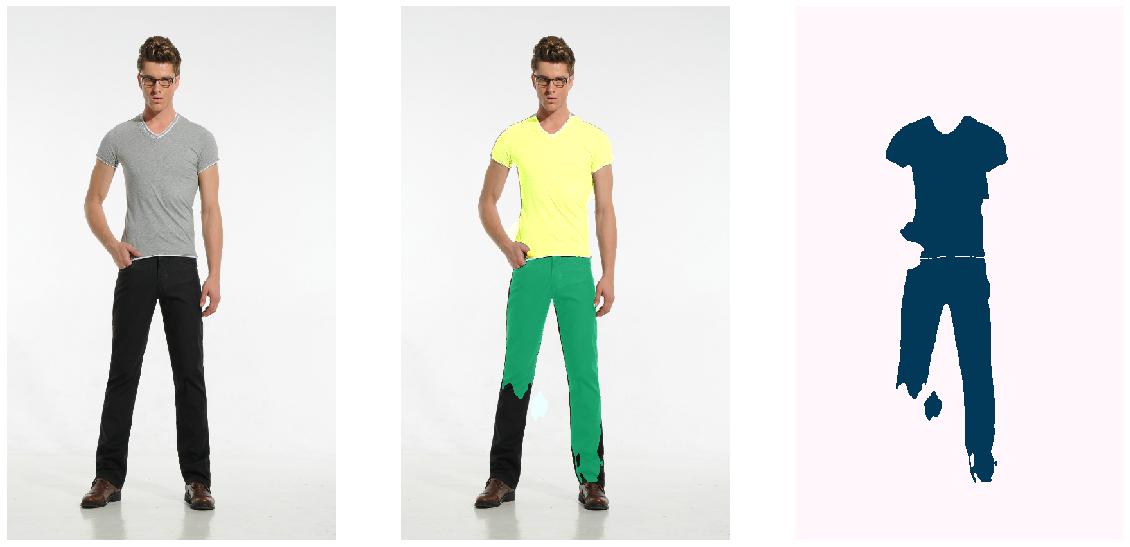

In [15]:
pad=0 # Some images works better if the person is center and full body
show_out(cv2.copyMakeBorder(plt.imread("../img/test_1.jpg")/255,pad,pad,pad,pad,cv2.BORDER_CONSTANT))